In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading the data
data  = pd.read_csv(r'C:\Users\Ishan\Desktop\my data\headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


 so here we are gonna find the relationship between brain sizes and the head weights 

In [12]:
#collecting x and y 
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [13]:
#calculating mean of x and y 
###   y = mx+c  ;   y = b1x+b0###
# here b0 is coefficient and b1 is m

mean_x = np.mean(X)
mean_y = np.mean(Y)

#total number of values 
m = len(X)

#using the formula to calculate the calues of b1 and b0
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x)*(Y[i] - mean_y)
    denom += (X[i] - mean_x)**2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

#print coefficients
print(b1,b0)


0.26342933948939945 325.57342104944223


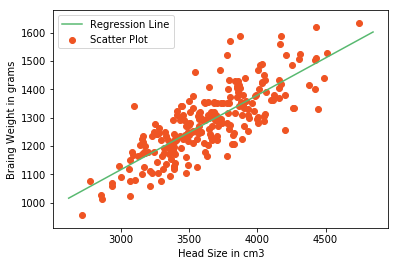

In [18]:
#plotting the values and the regression line 

max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating line values x and y

x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

#plotting the line 
plt.plot(x,y,color='#58b970' , label = 'Regression Line')

#Plotting the scattering points
plt.scatter(X,Y,c= '#ef5423', label = 'Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Braing Weight in grams')
plt.legend()
plt.show()

In [20]:
#finding the goodness of the regresion model
ss_t = 0    #total sum of square
ss_r = 0    #total sum of square of residuals 
for i in range(m):
    y_pred = b0 +  b1*X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2 
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


# Linear Regression Using ML Library

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((m, 1))

#creating the model
reg = LinearRegression()

#fitting the training model
reg = reg.fit(X,Y)

#Y prediction
y_pred = reg.predict(X)

#calculating r2 score
r2_score = reg.score(X,Y)

print(r2_score)


0.639311719957
